In [1]:
from utils import configure_environment
configure_environment(seed=38239)


Seed set to 38239


Device set to cuda


In [ ]:
from itertools import product
import numpy as np
from keras.metrics import binary_accuracy
import matplotlib.pyplot as plt

from models import BinaryLSTMAttentionClassifier, BinaryConvolutionalClassifier, BinaryLSTMClassifier
from generators import SubsequenceDiscriminationData

In [3]:
character_options = [2, 4, 8, 16, 32]
sequence_length_options = [16, 32, 64, 128, 256, 512]
epochs_per_experiment = 2000

In [4]:
def experiment(model, characters, sequence_length, epochs, aggr=100):
	generator = SubsequenceDiscriminationData(characters=characters, length=sequence_length, batch_size=128)
	model = model(input_length=sequence_length, tokens=characters)
	model.fit(generator, epochs=epochs, callbacks=[])
	acc = [binary_accuracy(targets, model(x)).mean().item() for x, targets in (generator() for _ in range(aggr))]
	return sum(acc)/len(acc)


def plot_experiment(data: list):
	data = np.array(data).reshape(len(character_options), len(sequence_length_options))

	fig, ax = plt.subplots(figsize=(8, 6))
	cax = ax.matshow(data, cmap='Blues', vmin=0.5, vmax=1.0)
	fig.colorbar(cax, shrink=0.73)
	ax.set_xticks(range(len(sequence_length_options)))
	ax.set_xticklabels(sequence_length_options)
	ax.set_yticks(range(len(character_options)))
	ax.set_yticklabels(character_options)
	ax.set_ylabel("Alphabet Cardinality")
	ax.set_xlabel("Sequence Length")
	plt.tight_layout()
	plt.show()

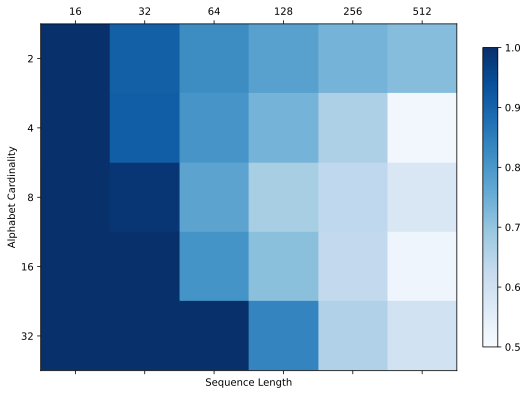

CPU times: user 22min 56s, sys: 15.6 s, total: 23min 12s
Wall time: 14min 42s


In [5]:
%%time
plot_experiment([experiment(BinaryConvolutionalClassifier, characters, length, epochs_per_experiment) for characters, length in product(character_options, sequence_length_options)])

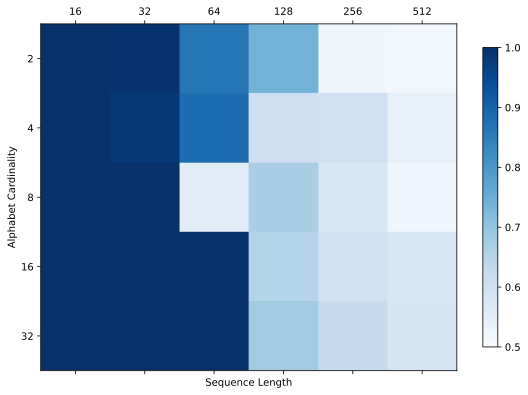

CPU times: user 2h 26min 56s, sys: 16.1 s, total: 2h 27min 12s
Wall time: 2h 21min 54s


In [6]:
%%time
plot_experiment([experiment(BinaryLSTMClassifier, characters, length, epochs_per_experiment) for characters, length in product(character_options, sequence_length_options)])

2024-12-15 15:23:25.077933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-15 15:23:25.090365: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-15 15:23:25.094063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-15 15:23:25.104112: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-15 15:23:26.072640: W tensorflow/compiler/tf2

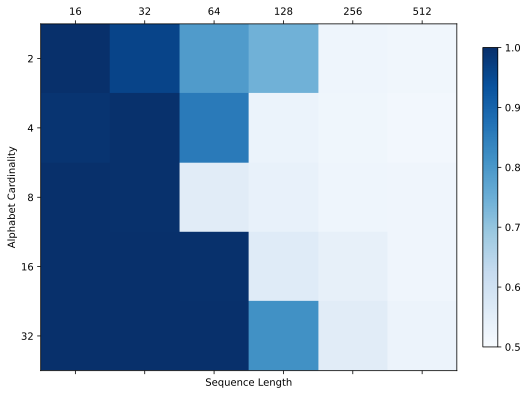

CPU times: user 4h 41min 13s, sys: 21.7 s, total: 4h 41min 34s
Wall time: 4h 36min 55s


In [ ]:
%%time
plot_experiment([experiment(BinaryLSTMAttentionClassifier, characters, length, epochs_per_experiment) for characters, length in product(character_options, sequence_length_options)])